In [4]:
import math

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62, 47), row['label']

In [43]:
df = pd.read_csv('data/6/persons_pics_train.csv')
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913',
       'label'],
      dtype='object', length=2915)

(-0.5, 46.5, 61.5, -0.5)

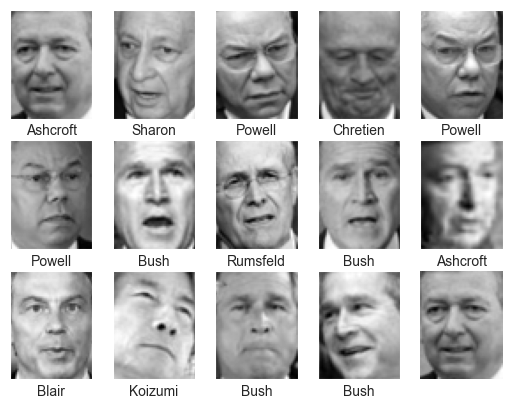

In [6]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
    
# plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

In [11]:
df['label'].unique()

array(['John Ashcroft', 'Ariel Sharon', 'Colin Powell', 'Jean Chretien',
       'George W Bush', 'Donald Rumsfeld', 'Tony Blair',
       'Junichiro Koizumi', 'Gerhard Schroeder', 'Hugo Chavez',
       'Serena Williams', 'Jacques Chirac'], dtype=object)

In [23]:
np.round(df[df['label'] == 'Junichiro Koizumi'].shape[0] / df.shape[0], 3)

0.038

In [56]:
labels = df['label'].unique()

# df_averaged = df.copy()

averages = {label: df[df['label'] == label].drop('label', axis=1).mean() for label in labels}

def f_mean(row): 
    return averages[row['label']]

df_averaged = df.apply(f_mean, axis=1)
df_averaged['label'] = df['label']

(-0.5, 46.5, 61.5, -0.5)

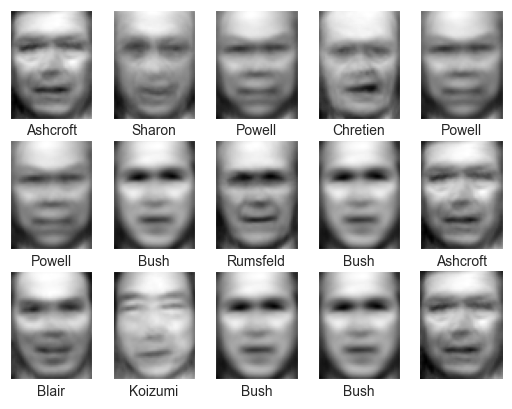

In [57]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df_averaged.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
    
# plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')
plt.imshow(df_averaged.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(np.array([averages['Jacques Chirac']]), np.array([averages['Serena Williams']]))

array([[0.98347907]])

# Task 3

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]


def get_f1_score(dataset, label: str = 'label'):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13, stratify=dataset[label])

    regressor = SVC(kernel='linear', random_state=13)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)

    return np.round(f1_score(Y_test, Y_predicted, average='weighted'), 3)

In [63]:
get_f1_score(df)

0.808

In [94]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[13]}]

X, Y = split_dataset(df, 'label')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13, stratify=df['label'])

In [ ]:
cv = GridSearchCV(SVC(), tuned_parameters, n_jobs=10, refit=True, verbose=3)
cv.fit(X_train, Y_train)

In [73]:
cv.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'gamma': 0.001,
 'kernel': 'rbf',
 'random_state': 13}

In [74]:
Y_pred = cv.predict(X_test)

In [75]:
np.round(f1_score(Y_test, Y_pred, average='weighted'), 3)

0.815

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=173, svd_solver='full')
pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
explained_variance

array([0.239, 0.366, 0.431, 0.485, 0.528, 0.554, 0.577, 0.596, 0.614,
       0.629, 0.644, 0.657, 0.668, 0.679, 0.689, 0.699, 0.707, 0.716,
       0.724, 0.732, 0.738, 0.744, 0.75 , 0.755, 0.76 , 0.765, 0.77 ,
       0.774, 0.779, 0.783, 0.786, 0.79 , 0.794, 0.797, 0.8  , 0.803,
       0.806, 0.809, 0.812, 0.815, 0.818, 0.821, 0.823, 0.826, 0.828,
       0.831, 0.833, 0.835, 0.838, 0.84 , 0.842, 0.844, 0.846, 0.848,
       0.85 , 0.852, 0.854, 0.856, 0.858, 0.86 , 0.861, 0.863, 0.865,
       0.866, 0.868, 0.869, 0.871, 0.872, 0.874, 0.875, 0.877, 0.878,
       0.879, 0.881, 0.882, 0.883, 0.885, 0.886, 0.887, 0.888, 0.889,
       0.891, 0.892, 0.893, 0.894, 0.895, 0.896, 0.897, 0.898, 0.899,
       0.9  , 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, 0.907, 0.908,
       0.909, 0.91 , 0.911, 0.911, 0.912, 0.913, 0.914, 0.915, 0.915,
       0.916, 0.917, 0.918, 0.918, 0.919, 0.92 , 0.921, 0.921, 0.922,
       0.923, 0.923, 0.924, 0.925, 0.925, 0.926, 0.927, 0.927, 0.928,
       0.928, 0.929,

In [96]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [97]:
cv = GridSearchCV(SVC(), tuned_parameters, n_jobs=10, refit=True, verbose=3)
cv.fit(X_train, Y_train)
cv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'C': 1000,
 'class_weight': None,
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'random_state': 13}

In [98]:
Y_pred = cv.predict(X_test)
np.round(f1_score(Y_test, Y_pred, average='weighted'), 3)

0.815